Text(0.5, 1.0, 'Demand')

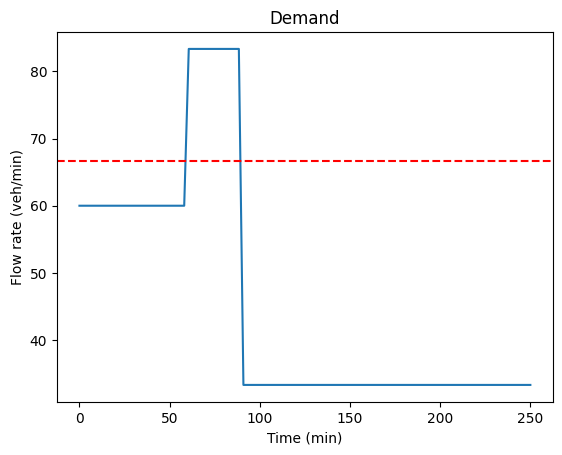

In [58]:

def q_in(t):
    if t < 0:
        return 0
    elif t < 60:
        return 3600 / 60
    elif t < 1.5*60:
        return 5000 / 60
    else:
        return 2000 / 60
    
capacity = 4000 / 60

# Plot the flow rate
import matplotlib.pyplot as plt
import numpy as np

t = np.linspace(0, 250, 100)
q = [q_in(ti) for ti in t]

plt.plot(t, q, label='Demand')
plt.axhline(y=capacity, color='r', linestyle='--', label='Capacity')
plt.xlabel('Time (min)')
plt.ylabel('Flow rate (veh/min)')
plt.title('Demand')

Text(0.5, 1.0, 'Cumulative demand')

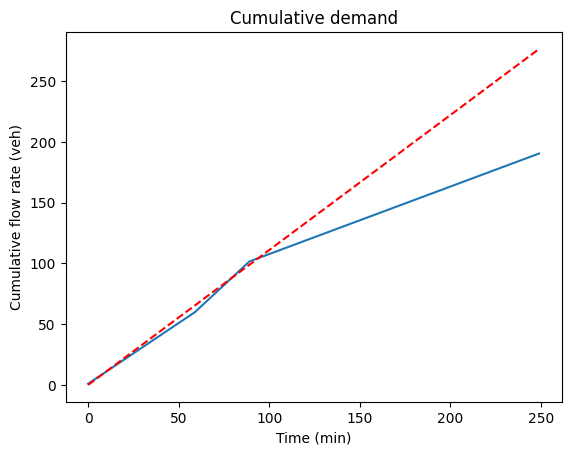

In [52]:
# Plot the cumulative flow rate
T = 0
dt = 1 # min
ts = np.arange(0, 250, dt)

Q = []
for t in ts:
    T += q_in(t)*dt/60
    Q.append(T)
    
cum_capacity = [capacity*t/60 for t in ts]

out_flow = [min(capacity, q_in(t)) for t in ts]
    
plt.figure()
plt.plot(ts, Q)
plt.plot(ts, cum_capacity, 'r--')
plt.xlabel('Time (min)')
plt.ylabel('Cumulative flow rate (veh)')
plt.title('Cumulative demand')

    


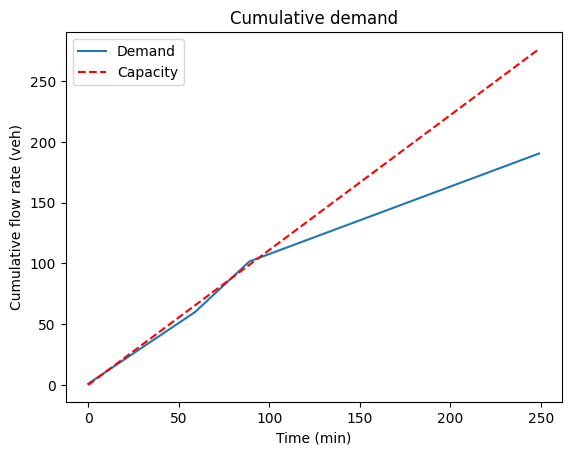

In [54]:
# Same plot but only between 50 and 100
plt.figure()
plt.plot(ts, Q, label='Demand')
plt.plot(ts, cum_capacity, 'r--', label='Capacity')
plt.xlabel('Time (min)')
plt.ylabel('Cumulative flow rate (veh)')
plt.title('Cumulative demand')
plt.legend()

plt.show()

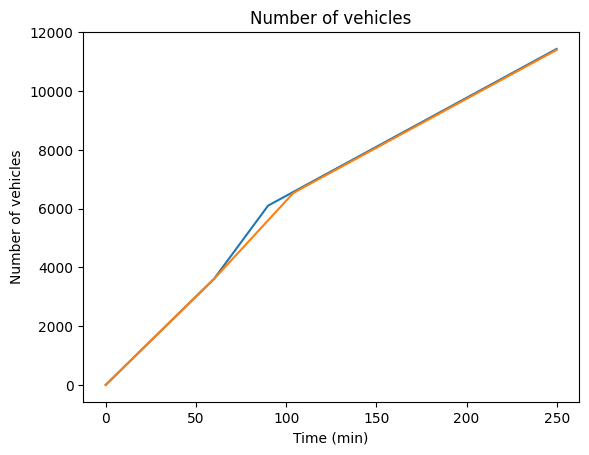

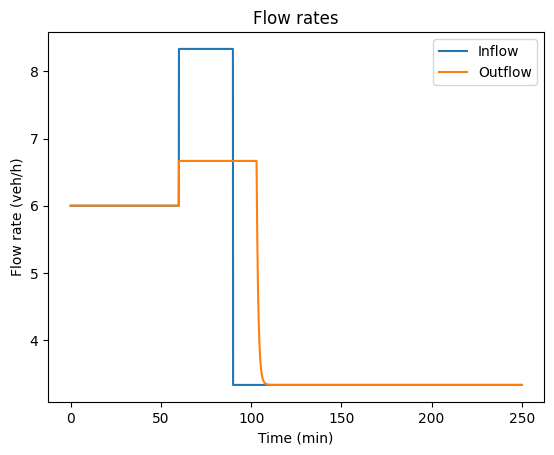

In [ ]:
N_in = [0]
N_out = [0]
dt = 0.1 # min
ts = np.arange(0, 250, dt)


inflows = []
outflows = []

for t in ts:
    inflow = q_in(t)*dt
    if inflow > capacity*dt:
        outflow = capacity*dt
    elif N_in[-1] > N_out[-1]:
        outflow = min(N_in[-1] - N_out[-1], capacity) * dt
    else:
        outflow = inflow
        
    N_in.append(N_in[-1] + inflow)
    N_out.append(N_out[-1] + outflow)    
    inflows.append(inflow)
    outflows.append(outflow)
    

plt.figure()
plt.plot(ts, N_in[1:], label='Inflow')
plt.plot(ts, N_out[1:], label='Outflow')
plt.xlabel('Time (min)')
plt.ylabel('Number of vehicles')
plt.title('Number of vehicles')

# Plot the inflow and outflow rates in new plot with same time range
plt.figure()
plt.plot(ts, inflows, label='Inflow')
plt.plot(ts, outflows, label='Outflow')
plt.xlabel('Time (min)')
plt.ylabel('Flow rate (veh/h)')
plt.title('Flow rates')
plt.legend()


plt.show()


    
    